In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


In [2]:
matplotlib.rcParams['font.family'] = 'AppleGothic'
matplotlib.rcParams['font.family']

['AppleGothic']

# 데이터 가져오기

시트구성: 동별매출지수, 카테고리별 매출비중, 종합테이블

매출지수 = 기준일 매출을 ‘100’이라고 할 때 특정 시점의 상대적 매출을 표시하는 지수. ‘100’이 넘으면 더 많이 팔렸다는 의미. (기준일: 2019.04.11, 서울 중구 신당5동)





In [3]:
경로 = '../../data/bigcontest/04_유통데이터(GS리테일)/04_혁신아이디어분야_유통데이터(GS리테일)_데이터정의서 및 문제 데이터.xlsx'
retail_data_total = pd.read_excel(경로
                           ,sheet_name = '종합테이블(TB_DD_STR_PURCH_CLS)'
                           ,header = 0)

In [4]:
retail_data_total.OPER_DT = pd.to_datetime(retail_data_total.OPER_DT,format='%Y%m%d')
retail_data_total['AMT_IND'] = retail_data_total['AMT_IND']*100
retail_data_total['DL_Y'] = retail_data_total.OPER_DT.dt.year
retail_data_total['DL_W'] = retail_data_total.OPER_DT.dt.weekofyear

In [5]:
retail_data_total.head()

,OPER_DT,PVN,BOR,ADMD,AMT_IND,LCLS_10_P,LCLS_20_P,LCLS_30_P,LCLS_40_P,LCLS_50_P,LCLS_60_P,LCLS_70_P,LCLS_80_P,DL_Y,DL_W
0,2019-02-01,대구광역시,수성구,고산1동,106.433557,0.450848,0.172221,0.295458,0.023263,0.044679,0.005075,0.004820,0.003637,2019,5
1,2019-02-01,대구광역시,수성구,고산2동,107.641799,0.457937,0.196274,0.295564,0.005521,0.034056,0.000844,0.008893,0.000913,2019,5
2,2019-02-01,대구광역시,수성구,고산3동,85.607140,0.359978,0.196602,0.376762,0.013408,0.029606,0.009117,0.008831,0.005697,2019,5
3,2019-02-01,대구광역시,수성구,두산동,72.486779,0.281969,0.175207,0.363202,0.024235,0.134191,0.000000,0.021196,0.000000,2019,5
4,2019-02-01,대구광역시,수성구,만촌1동,115.572808,0.400983,0.200454,0.310531,0.038868,0.035427,0.005284,0.005734,0.002719,2019,5


In [6]:
#연도별로 나누기
total_19 = retail_data_total[retail_data_total.OPER_DT.dt.year==2019]
total_20 = retail_data_total[retail_data_total.OPER_DT.dt.year==2020]

#길이가 다름, 2020년에는 2월 29일이 있어서
len(total_19),len(total_20)

(7200, 7260)

### 시간에 따른 매출지수 변화 (구 별)

- 19년도에 매출지수가 대체로 높은 것으로 보아 19년도에 20년도 보다 잘팔린 것을 알 수 있다
- 19년에는 노원구와 중구간에 매출지수 차이가 컸지만 20년도에는 차이가 줄어들고 둘이 거의 비슷함 (대구도 비슷함), 유동인구가 줄은것과 관련이 있을 것으로 예상->사는 품목에 변화가 있는지 알아보면 좋을 듯
- 대구의 경우 19년도 주말에 매출이 늘어나는 형태였지만 20년도에는 주말에 매출이 줄어드는 형태 

- 코로나19 감염이 심각해짐에 따라 매출이 줄어들었다가 점차 완화되면서 매출이 증가하는 것을 보임

- 갑자기 증가한 날짜는 화이트데이와 발렌타인데이


In [7]:
#total_19[total_19.OPER_DT.dt.weekofyear == 5]

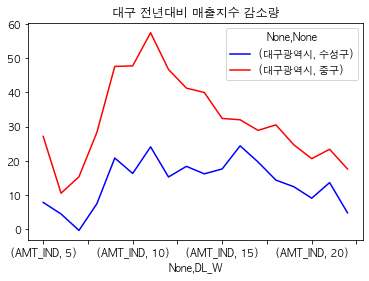

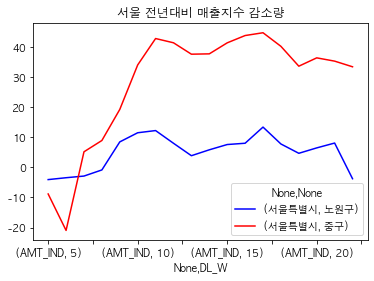

In [67]:
df_AMT_19 = total_19.groupby(['DL_W','PVN','BOR'])[['AMT_IND']].mean()
df_AMT_20 = total_20.groupby(['DL_W','PVN','BOR'])[['AMT_IND']].mean()
#df_AMT_19.unstack(0).transpose().plot()
#df_AMT_20.transpose()

df1 = pd.DataFrame(df_AMT_19.unstack(0).loc[('대구광역시', '수성구')])\
-pd.DataFrame(df_AMT_20.unstack(0).loc[('대구광역시', '수성구')])
df2 = pd.DataFrame(df_AMT_19.unstack(0).loc[('대구광역시', '중구')])\
-pd.DataFrame(df_AMT_20.unstack(0).loc[('대구광역시', '중구')])
df1.join(df2).plot(title = '대구 전년대비 매출지수 감소량', color = ['b','r'])

df3 = pd.DataFrame(df_AMT_19.unstack(0).loc[('서울특별시', '노원구')])\
-pd.DataFrame(df_AMT_20.unstack(0).loc[('서울특별시', '노원구')])
df4 = pd.DataFrame(df_AMT_19.unstack(0).loc[('서울특별시', '중구')])\
-pd.DataFrame(df_AMT_20.unstack(0).loc[('서울특별시', '중구')])
df3.join(df4).plot.line(title = '서울 전년대비 매출지수 감소량', color = ['b','r'])
plt.rc('axes', unicode_minus=False)




In [ ]:
retail_data_total

#일 별
df_AMT_19 = total_19.groupby(['OPER_DT','PVN','BOR'])[['AMT_IND']].mean()
df_AMT_20 = total_20.groupby(['OPER_DT','PVN','BOR'])[['AMT_IND']].mean()

fig, axes = plt.subplots(2,1,figsize=(13,8))
df_AMT_19.unstack(0).transpose().plot(ax = axes[0])
df_AMT_20.unstack(0).transpose().plot(ax = axes[1])

In [ ]:
#fig, axes = plt.subplots(1,2,figsize=(10,5))
#df_AMT_19.unstack(0).transpose().apply(sum, axis = 0).plot(kind = 'bar',ax = axes[0])
#df_AMT_20.unstack(0).transpose().apply(sum, axis = 0).plot(kind = 'bar',ax = axes[1])

In [ ]:
AMT_19_mean = pd.DataFrame(df_AMT_19.unstack(0).transpose().apply(np.average, axis = 0))
AMT_20_mean = pd.DataFrame(df_AMT_20.unstack(0).transpose().apply(np.average, axis = 0))

In [ ]:
AMT_19_mean.columns = ['2019']
AMT_20_mean.columns = ['2020']
AMT_mean.index

In [ ]:
AMT_mean = AMT_19_mean.join(AMT_20_mean)

#fig, axes = plt.subplots(1,2,figsize=(13,8))
AMT_mean.plot.bar()
plt.title('평균매출지수')
plt.xticks(rotation = 20)
#plt.savefig('image')
#(kind = 'bar', title = '평균매출지수')


In [ ]:
# 윤월을 고려해서 29일을 뺀 버전
df_AMT_20

In [ ]:
# 갑자기 튀어나온 날 날짜
# 3/14일, 2/14일 화이트데이, 발렌타인 데이->간식거리가 매출 증가했는지 확인
# 전년도에 비해 3/14일 판매강세 줄어들음
df_AMT_19.unstack(0).transpose().idxmax(),\ 
df_AMT_20.unstack(0).transpose().idxmax()

In [ ]:
#간식거리의 매출비중(LCLS_20_P)이 평소보다 늘은 것을 알 수 있다.
df_19_valentine = pd.DataFrame(total_19[total_19.OPER_DT == '2019-02-14'].mean(), columns = ['2019'])
df_20_valentine = pd.DataFrame(total_20[total_20.OPER_DT == '2020-02-14'].mean(), columns = ['2020'])
pd.concat([total_19.mean(), df_19_valentine, df_20_valentine], axis = 1)

### 시간에 따른 매출비중 변화 (업종 별)
- 작년과 추이를 비교해보면 헬스&뷰티(50), 사회활동(70), 임신/육아(80)의 매출이 다르다
- 헬스&뷰티(50)의 경우 2020년 줄어들음, 초반에만 많은데 마스크로 볼 수 있다
- 사회활동(70)의 경우 2020년 가장 많이 줄어들음.
- 임신/육아(80)의 경우 서울의 변동폭이 커졌다.

In [ ]:
#2019
df_10_19 = total_19.groupby(['OPER_DT','PVN','BOR'])[['LCLS_10_P']].mean()
df_20_19 = total_19.groupby(['OPER_DT','PVN','BOR'])[['LCLS_20_P']].mean()
df_30_19 = total_19.groupby(['OPER_DT','PVN','BOR'])[['LCLS_30_P']].mean()
df_40_19 = total_19.groupby(['OPER_DT','PVN','BOR'])[['LCLS_40_P']].mean()
df_50_19 = total_19.groupby(['OPER_DT','PVN','BOR'])[['LCLS_50_P']].mean()
df_60_19 = total_19.groupby(['OPER_DT','PVN','BOR'])[['LCLS_60_P']].mean()
df_70_19 = total_19.groupby(['OPER_DT','PVN','BOR'])[['LCLS_70_P']].mean()
df_80_19 = total_19.groupby(['OPER_DT','PVN','BOR'])[['LCLS_80_P']].mean()

fig, axes = plt.subplots(8,2,figsize=(13,15))
df_10_19.unstack(0).transpose().plot(ax = axes[0,0], legend = False, title = '2019')
df_20_19.unstack(0).transpose().plot(ax = axes[1,0], legend = False)
df_30_19.unstack(0).transpose().plot(ax = axes[2,0], legend = False)
df_40_19.unstack(0).transpose().plot(ax = axes[3,0], legend = False)
df_50_19.unstack(0).transpose().plot(ax = axes[4,0], legend = False)
df_60_19.unstack(0).transpose().plot(ax = axes[5,0], legend = False)
df_70_19.unstack(0).transpose().plot(ax = axes[6,0], legend = False)
df_80_19.unstack(0).transpose().plot(ax = axes[7,0], legend = False)

#2020
df_10_20 = total_20.groupby(['OPER_DT','PVN','BOR'])[['LCLS_10_P']].mean()
df_20_20 = total_20.groupby(['OPER_DT','PVN','BOR'])[['LCLS_20_P']].mean()
df_30_20 = total_20.groupby(['OPER_DT','PVN','BOR'])[['LCLS_30_P']].mean()
df_40_20 = total_20.groupby(['OPER_DT','PVN','BOR'])[['LCLS_40_P']].mean()
df_50_20 = total_20.groupby(['OPER_DT','PVN','BOR'])[['LCLS_50_P']].mean()
df_60_20 = total_20.groupby(['OPER_DT','PVN','BOR'])[['LCLS_60_P']].mean()
df_70_20 = total_20.groupby(['OPER_DT','PVN','BOR'])[['LCLS_70_P']].mean()
df_80_20 = total_20.groupby(['OPER_DT','PVN','BOR'])[['LCLS_80_P']].mean()

df_10_19.unstack(0).transpose().plot(ax = axes[0,1], legend = False, title = '2020')
df_20_20.unstack(0).transpose().plot(ax = axes[1,1], legend = False)
df_30_20.unstack(0).transpose().plot(ax = axes[2,1], legend = False)
df_40_20.unstack(0).transpose().plot(ax = axes[3,1], legend = False)
df_50_20.unstack(0).transpose().plot(ax = axes[4,1], legend = False)
df_60_20.unstack(0).transpose().plot(ax = axes[5,1], legend = False)
df_70_20.unstack(0).transpose().plot(ax = axes[6,1], legend = False)
df_80_20.unstack(0).transpose().plot(ax = axes[7,1], legend = False)

In [ ]:
df_60_20.idxmax()
df_70_20.idxmax()

### 100이상의 경우 업종 분포

In [ ]:
col_list = retail_data_total.columns
col_list

In [ ]:
#2019 매출 좋은 곳
total_19_up100 = total_19[total_19.AMT_IND>=100]
df = total_19_up100.groupby(['PVN','BOR','ADMD'])[col_list[5:]].mean()
fig, axes = plt.subplots(1,2,figsize=(12,8))

df.loc['서울특별시'].plot(kind = 'barh',stacked = True, ax = axes[0], title = '서울')
df.loc['대구광역시'].plot(kind = 'barh',stacked = True, ax = axes[1], title = '대구')

In [ ]:
#2019 매출 안좋은 곳
total_19_down100 = total_19[total_19.AMT_IND<100]
df = total_19_down100.groupby(['PVN','BOR','ADMD'])[col_list[5:]].mean()
fig, axes = plt.subplots(1,2,figsize=(12,8))
df.loc['서울특별시'].plot(kind = 'barh',stacked = True, ax = axes[0], title = '서울')
df.loc['대구광역시'].plot(kind = 'barh',stacked = True, ax = axes[1], title = '대구')

In [ ]:
#2020 매출 좋은 곳
total_20_up100 = total_20[total_20.AMT_IND>=100]
df = total_20_up100.groupby(['PVN','BOR','ADMD'])[col_list[5:]].mean()
fig, axes = plt.subplots(1,2,figsize=(12,8))

df.loc['서울특별시'].plot(kind = 'barh',stacked = True, ax = axes[0], title = '서울')
df.loc['대구광역시'].plot(kind = 'barh',stacked = True, ax = axes[1], title = '대구')

In [ ]:
#2020 매출 안좋은 곳
total_20_down100 = total_20[total_20.AMT_IND<100]
df = total_20_down100.groupby(['PVN','BOR','ADMD'])[col_list[5:]].mean()
fig, axes = plt.subplots(1,2,figsize=(12,8))

df.loc['서울특별시'].plot(kind = 'barh',stacked = True, ax = axes[0], title = '서울')
df.loc['대구광역시'].plot(kind = 'barh',stacked = True, ax = axes[1], title = '대구')

In [ ]:
print('높은 매출 유지동:',len(set(total_20_up100.ADMD).intersection(set(total_19_up100.ADMD)))
     ,'높은 매출로 오른동:', len(set(total_20_up100.ADMD).difference(set(total_19_up100.ADMD))))
print('낮은 매출 유지동:',len(set(total_20_down100.ADMD).intersection(set(total_19_down100.ADMD)))
     ,'낮은 매출로 내린동:', len(set(total_20_down100.ADMD).difference(set(total_19_down100.ADMD))))